jupyter技巧

https://blog.csdn.net/tina_ttl/article/details/51031113#

https://www.jianshu.com/p/a85bc2a8fa56

https://www.zhihu.com/question/59392251

http://bokeh.pydata.org/en/latest/docs/user_guide/notebook.html

http://liuchengxu.org/pelican-blog/jupyter-notebook-tips.html

https://zhuanlan.zhihu.com/p/36389916

https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Ftowardsdatascience.com%2Finteractive-visualizations-in-jupyter-notebook-3be02ab2b8cd

https://mortada.net/easily-profile-python-code-in-jupyter.html

https://github.com/QuantStack/xeus-cling

https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Fblog.jupyter.org%2Fa-diagram-editor-for-jupyterlab-a254121ff919

https://medium.com/@r_kierzkowski/10-tips-on-using-jupyter-notebook-abc0ba7028a4

https://xeus-cling.readthedocs.io/en/latest/

exercise

In [ ]:
a = 10
print(a)

test

In [3]:
aaa = 10

bbb

In [ ]:
e =1

In [ ]:
ddd=1

In [ ]:
ccc = 1

同样在其中一个cell（建议放在最开始的一个cell中）中输入一下代码，这个在你自己编辑notebook时不起作用，对导出结果中所有代码起作用：导出html或者pdf中是没有代码的。同样把它定义为函数集成在sciplot里面方便调用。

In [9]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

隐藏/显示代码按钮

在随便一个cell中加入以下代码并运行就可以得到一个按钮，点击它就可以实现隐藏和显示代码。在notebook中对所有代码起作用；但是对导出结果中只对hide所在cell起作用

In [10]:
import ipywidgets as widgets
from IPython.display import display, HTML
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}
def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))
def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
state = False
toggle_code(state)
button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")
display(button)

隐藏cell

上面的隐藏代码功能，针对所有的cell里面的代码显示或者隐藏。在我们编写notebook的过程中，有时候希望隐藏指定的cell（有可能因为有些cell里面的代码太长，我们不想看到它）。可以用一下代码实现，放在每一个cell里面，运行就会出现按钮能显示或者隐藏这个cell里面的内容。


In [19]:
import random
def hidecell(for_next):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
    toggle_text = '显示/隐藏'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    # bit of JS to permanently hide code in current cell (only when toggling next cell)
    js_hide_current = ''
    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1, 2**64)))
    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>
        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current,
        toggle_text=toggle_text
    )
    return HTML(html)

In [20]:
hidecell(False)

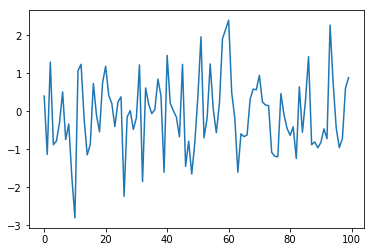

In [21]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.clf()
    pl.plot(pl.randn(100))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1.0)

<IPython.core.display.Javascript object>


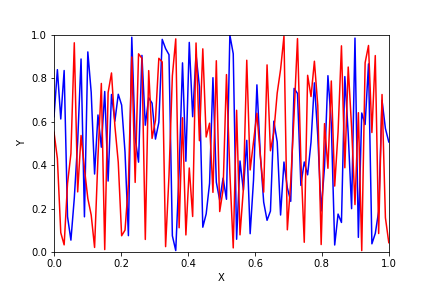

In [25]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

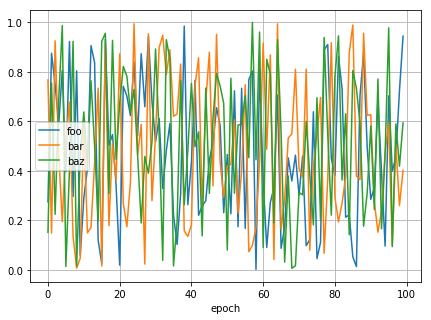

In [26]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

data = collections.defaultdict(list)
for i in range(100):
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)

将本地的.py文件load到jupyter的一个cell中

In [30]:
# %load test.py
import os
print(os)

<module 'os' from 'C:\\ProgramData\\Anaconda3\\lib\\os.py'>


Jupyter运行python文件

In [31]:
%run test.py

<module 'os' from 'C:\\ProgramData\\Anaconda3\\lib\\os.py'>


在jupyter中设置link，需要设置两部分

## 目录1
[the_destination](#the_destination)

<a id='the_destination'></a>
### dest

在Notebook的中开头cell中添加以下代码可以实现多行输出

In [33]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

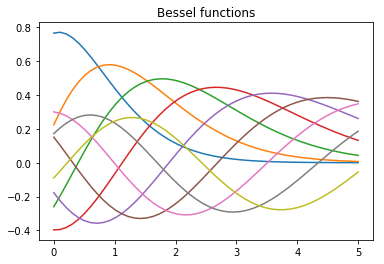

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")
for n in range(1,10):
   time.sleep(1)
   ax.plot(x, jn(x,n))
   clear_output(wait=True)
   display(f)    
plt.close()

代码自动完成

在代码顶部添加%config IPCompleter.greedy=True这一行并且shift+回车运行，对于接下来运行过的内容都会被列入自动提示中。
按Tab键弹出自动提示
如下图，输入my然后Tab键就弹出上面自定义的两个变量名，然后按回车直接输入myCount，按向下箭头键再回车就输入myNum。


In [35]:
%config IPCompleter.greedy=True

公式编辑器LaTeX

Notebook的Markdown单元是支持LateX公式编辑的，比如输入\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)运行得到下图

在库、方法或变量的前面打上?，即可打开相关语法的帮助文档。

In [36]:
?str.replace()

Jupyter Magic - %who: 列出所有的全局变量

In [37]:
%who 

CSS	 HTML	 InteractiveShell	 a	 aaa	 ax	 button	 button_action	 button_descriptions	 
ccc	 clear_output	 collections	 data	 di	 display	 f	 fig	 for_next	 
hidecell	 html	 i	 javascript_functions	 jn	 js_f_name	 js_hide_current	 json	 live_plot	 
n	 next_cell	 np	 os	 pl	 plt	 pltsin	 random	 state	 
target_cell	 this_cell	 time	 toggle_code	 toggle_text	 widgets	 x	 yapf_reformat	 


使用%%writefile magic可以保存cell的内容到外部文件。 而%pycat功能相反，把外部文件语法高亮显示（以弹出窗方式）。

In [38]:
%%writefile pythoncode.py 
import numpy 
def append_if_not_exists(arr, x): 
    if x not in arr: 
        arr.append(x) 

def some_useless_slow_function(): 
    arr = list() 
    for i in range(10000): 
        x = numpy.random.randint(0, 10000) 
        append_if_not_exists(arr, x)

Writing pythoncode.py


In [39]:
%pycat pythoncode.py

使用%prun+函数声明会给你一个按顺序排列的表格，显示每个内部函数的耗时情况，每次调用函数的耗时情况，以及累计耗时。

In [ ]:
%prun some_useless_slow_function()